# Milestone 3: Results
### On Tonal ambiguity and harmonic structure in Debussy’s piano music
#### By Ludovica Schaerf, Sabrina Laneve , Yuanhui Lin, Raphael Levier.

The notebook is articulated as follows:
1. [Precision of Research Question](#Research-Question)
2. [Refinement of Methods](#Methods)
3. [Presentation of final results](#Final-Results)
4. [Outlook on final interpretation](#Interpretation)

## Research Question


Precision of Research Question:

State the final version of your research question as you understand it now.

Make all assumptions and hypotheses explicit.

In case Milestone 2 did not include the final data representation that you are analyzing, present the representation you finally used and the necessary steps to get to it.

## Methods

Refinement of Methods

How did you deal with the problems you mentioned in Milestone 3?

Which methods did you use to obtain the final results? Provide self-contained explanations and make sure to cite relevant literature where appropriate.

Explain your core calculations using equations.

Do not describe all the methods you tried out but only those that lead to the results: the final analysis is not an exploratory analysis anymore.

Specify any adjustments you made to pre-existing methods.

## Final Results

Presentation of final results

Present your results in relation to your research question.

Present them in a logical order that does not have to be the order in which you achieved them.

### Pentatonic vs Diatonic Dispute

Firstly, we will present the results of the proposed algorithms to distinguish a pentatonic from a diatonic scale based on diffirent similarity measures. 

In the first two cells, the accuracy of Method 1 (here referring to the similarity measure to Cédric's table) and Method 2 (the method predicting based on the phase of the other coefficients) are presented. These are computed on the ground truth scales we extracted from Debussy's works. As one can see, the two are largely comparable and good (but not great). 

In [7]:
# Pentatonic vs Diatonic prediction

# method 1
from wavescapes import *
from glob import glob
import numpy as np
from predict_penta_dia import *
import matplotlib.pyplot as plt

penta_reductions = glob('./reductions/penta/*.mid')
dia_reductions = glob('./reductions/diatonic/*.mid')

tot = 0
correct = 0
for penta in penta_reductions:
    _,pred,_ = predict_penta_dia(penta, aw_size=1)
    tot += 1
    if pred == 'pentatonic scale':
        correct += 1

print('Method 1 score for pentatonic recognition', correct/tot)

tot = 0
correct = 0
for dia in dia_reductions:
    _,pred,_ = predict_penta_dia(dia,aw_size=1)
    tot += 1
    if pred == 'diatonic scale':
        correct += 1

print('Method 1 score for diatonic recognition', correct/tot)

Method 1 score for pentatonic recognition 0.7647058823529411
Method 1 score for diatonic recognition 0.631578947368421


In [3]:
# method 2
from predict_penta_dia_2 import *

tot = 0
correct = 0
for penta in penta_reductions:
    pred,_ = predict_penta_dia_2(penta,aw_size=1)
    tot += 1
    if pred == 'Pentatonic':
        correct += 1

print('Method 2 score for pentatonic recognition', correct/tot)

tot = 0
correct = 0
for dia in dia_reductions:
    pred,_ = predict_penta_dia_2(dia,aw_size=1)
    tot += 1
    if pred == 'Diatonic':
        correct += 1

print('Method 2 score for diatonic recognition', correct/tot)

Method 2 score for pentatonic recognition 0.7647058823529411
Method 2 score for diatonic recognition 0.5789473684210527


Based on the results above, we predict a scale Pentatonic if both algorithms identify it as Pentatonic and mixed otherwise. The same goes for Diatonic. In so doing, we distinguish more reliable results to lesser ones and can plot in time the tripartite results.

In [5]:
scores = glob('./scores/*.mid')

dic_scores = {}
for score in scores:
    #print('score:', score.split('\\')[-1])
    try:
        coeff, pred, _ = predict_penta_dia(score, aw_size=10)
        if coeff == 5:
            #print('method 1 prediction', pred)
            pred2,_ = predict_penta_dia_2(score)
            #print('method 2 prediction', pred2)
            if pred == 'diatonic scale' and pred2 == 'Diatonic':
                dic_scores[score] = pred2
            elif pred == 'pentatonic scale' and pred2 == 'Pentatonic':
                dic_scores[score] = pred2
            else:
                dic_scores[score] = 'Mixed'
    except:
        print('could not read score')

could not read score


Text(0.5, 1.0, 'Predicted scale between pentatonic and diatonic in time')

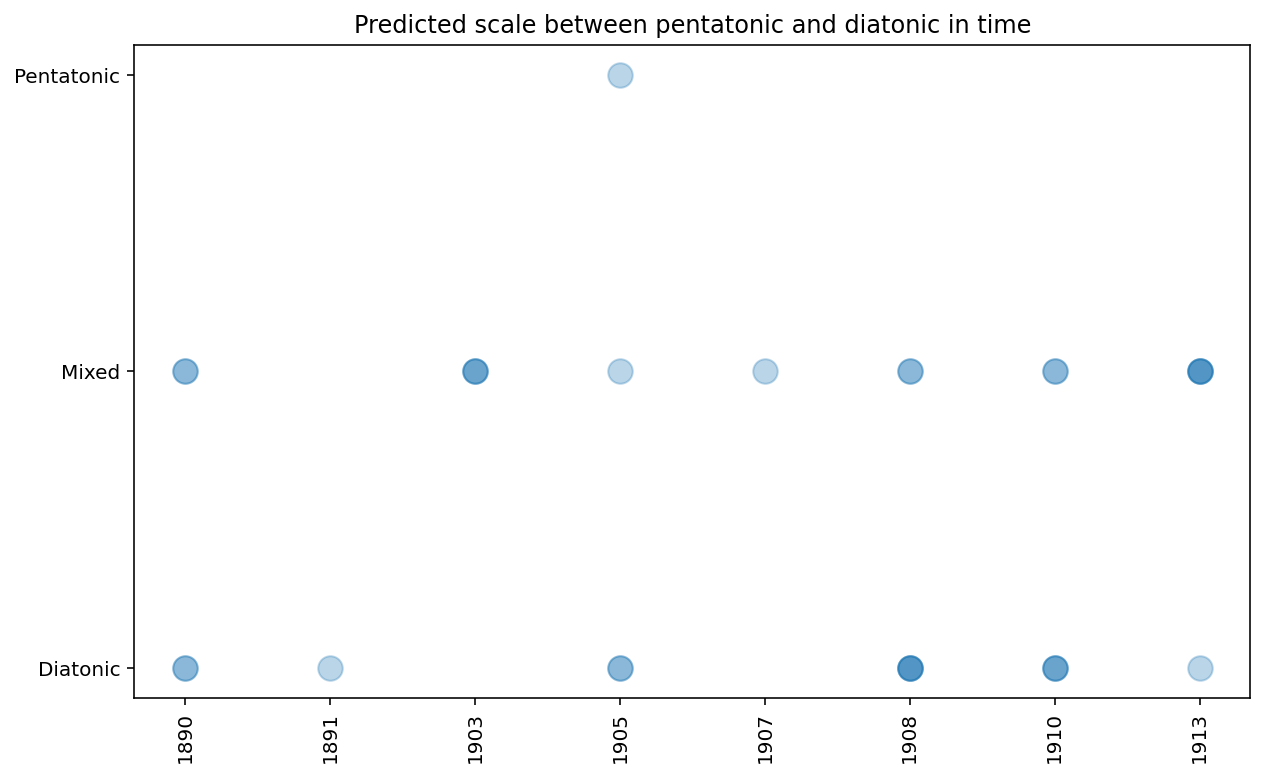

In [16]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot() 
ax.scatter([name.split('\\')[-1][:4] for name in dic_scores.keys()],
            list(dic_scores.values()),
            alpha=.3,
            s=150)
plt.xticks(rotation=90)
plt.title('Predicted scale between pentatonic and diatonic in time')

## Entropy of the pieces

In this section, we compute the entropy values over time based on the magnitude and the phase values, followed by an analysis of the number of peaks in the magnitude signal and a plot of the signal of the magnitude of the 5th coefficient given an early and a late work. 

In [1]:
from wavescapes import *
from glob import glob
import numpy as np
from predict_penta_dia import *
import matplotlib.pyplot as plt
from entropy_substructures import *

scores = glob('./scores/*.mid')
length_score = {}
for score in scores:
    try:
        length_score[score] = get_length_score(score)
    except:
        print('could not load file')
        
        
min_length = min(list(length_score.values()))
min_length

could not load file


24

In [9]:
entropies_05 = {}
for score in scores:
    try:
        subsec = min_length/(2*length_score[score])
        entropies_05[score] = compute_magnitude_entropy(score, ver_ratio=0.05, hor_ratio=(0.5 - subsec, 0.5 + subsec))
    except:
        print('could not load file')
        
print('finished magnitude entropies')

could not load file
finished magnitude entropies


No handles with labels found to put in legend.


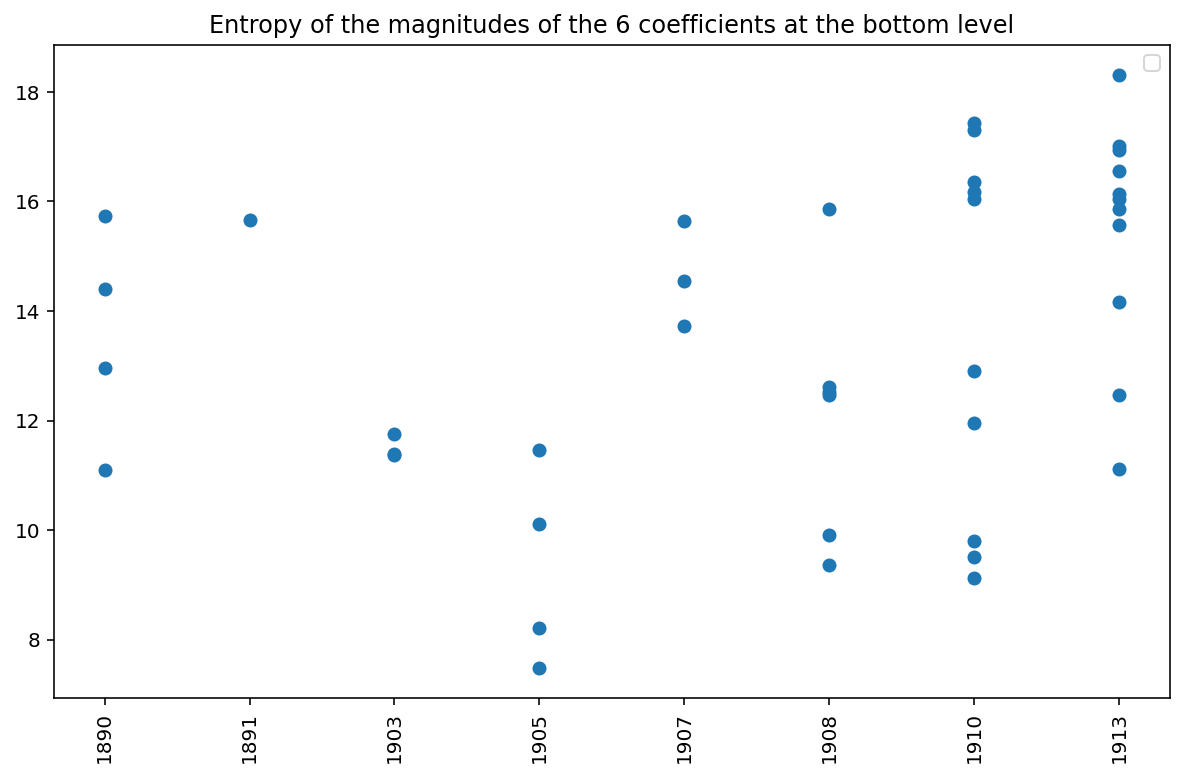

In [19]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot() 
x = [name.split('\\')[-1][:4] for name in entropies_05.keys()]
y = [np.array(val).sum() for val in entropies_05.values()]
ax.scatter(x, y)

plt.xticks(rotation=90)
plt.title('Entropy of the magnitudes of the 6 coefficients at the bottom level')
plt.legend(loc='upper right')

In [4]:
entropies_phase = {}
for score in scores:
    try:
        subsec = min_length/(2*length_score[score])
        entropies_phase[score] = compute_entropy_phase(score, ver_ratio=0.1, hor_ratio=(0.5 - subsec, 0.5 + subsec))
    except:
        print('could not load file')
        
print('finished phase entropies')

could not load file
finished phase entropies


No handles with labels found to put in legend.


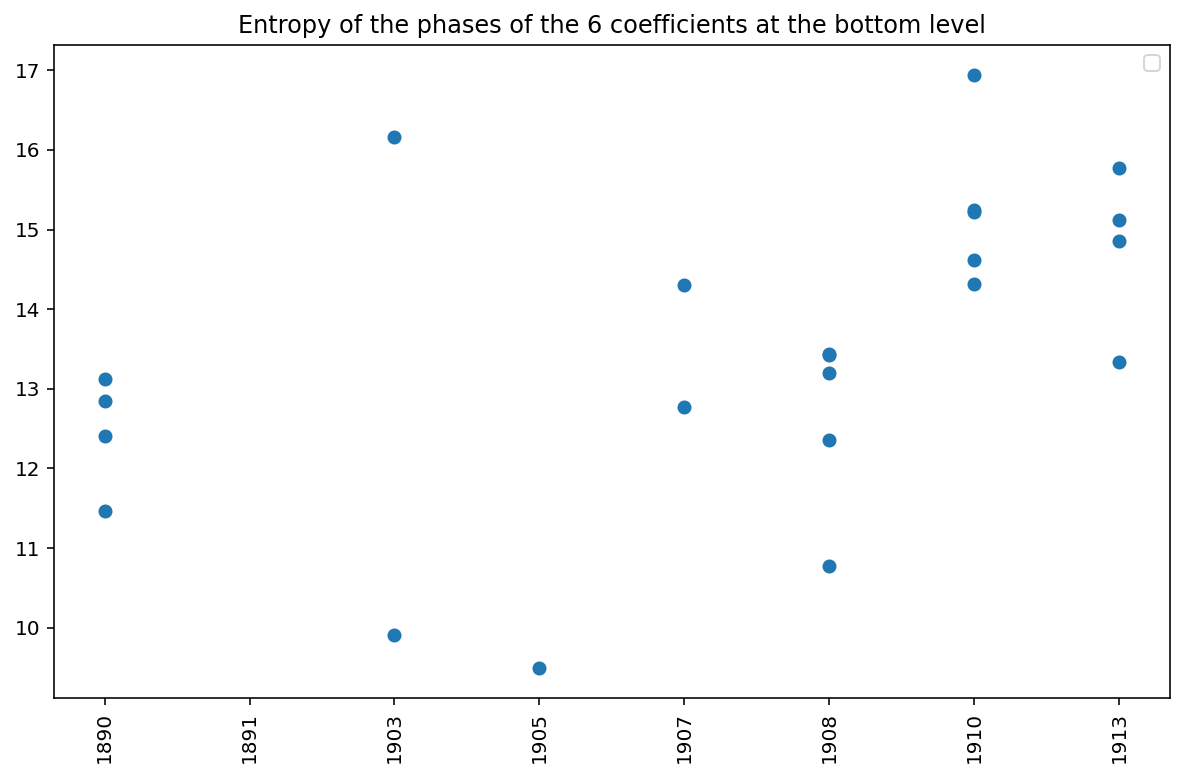

In [8]:
fig = plt.figure(figsize=(10, 6))
ax= fig.add_subplot() 
ax.scatter([name.split('\\')[-1][:4] for name in entropies_phase.keys()], [np.array(val).sum() for val in entropies_phase.values()])

plt.xticks(rotation=90)
plt.title('Entropy of the phases of the 6 coefficients at the bottom level')
plt.legend(loc='upper right')

In [10]:
magnitudes = {}
for score in scores:
    try:
        magnitudes[score] = compute_magnitude_5(score, ver_ratio=0.05)
    except:
        print('could not load file')
                    
print('finished magnitude of 5th coeffient')

could not load file
finished magnitude of 5th coeffient


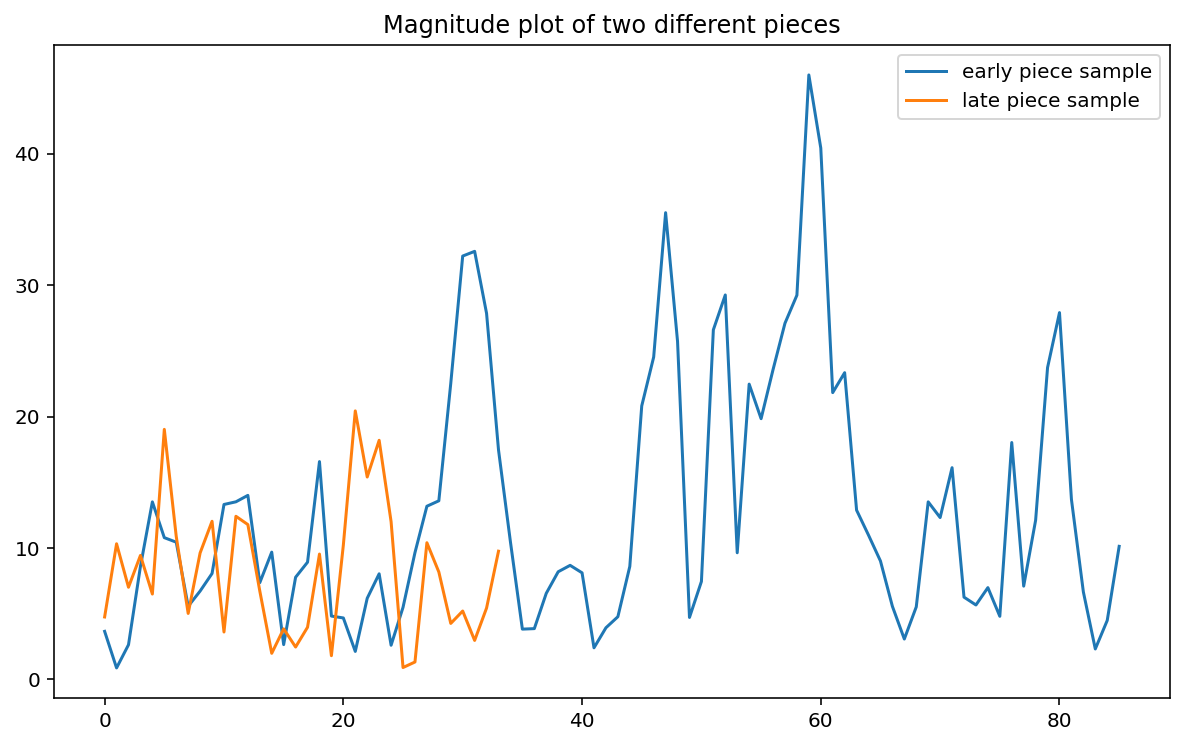

In [12]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot() 
ax.plot(list(magnitudes.values())[0], label='early piece sample')
ax.plot(list(magnitudes.values())[-3], label='late piece sample')
plt.title('Magnitude plot of two different pieces')
plt.legend()

In [11]:
peaks = {}
for score in scores:
    try:
        subsec = min_length/(2*length_score[score])
        peaks[score] = compute_peaks(score, ver_ratio=0.05, hor_ratio=(0.5 - subsec, 0.5 + subsec))
    except:
        print('could not load file')
        
print('finished peaks computation')

could not load file
finished peaks computation


Text(0.5, 1.0, 'Number of peaks per piece over the 6 coefficients')

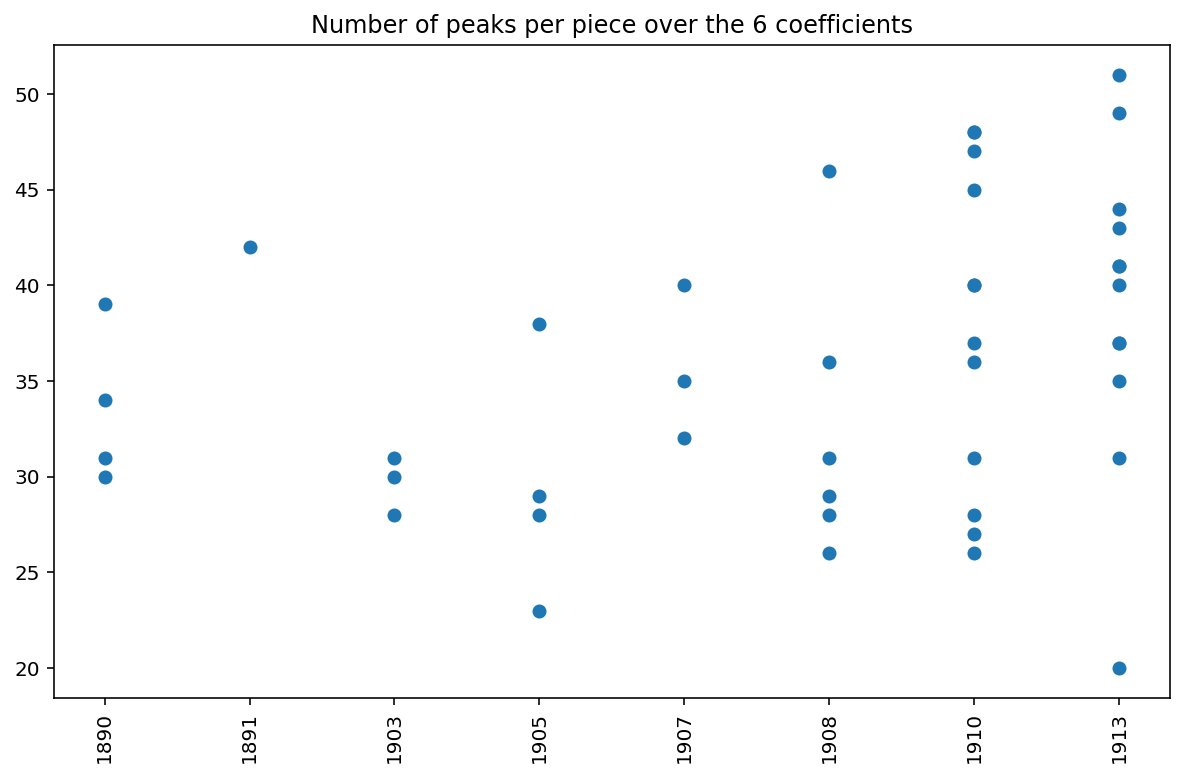

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot() 
ax.scatter([name.split('\\')[-1][:4] for name in peaks.keys()], [np.array(val).sum() for val in peaks.values()])
plt.xticks(rotation=90)
plt.title('Number of peaks per piece over the 6 coefficients')

## Predicting scales and chords of our data at different cardinalities

In [1]:
from predict_scale import *
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
scores = glob('./scores/*.mid')
data = {}
for score in scores:
    try:
        data[score] = predict_scale(score, ver_ratio=0.8)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_I._Prelude.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_II._Menuet.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid is a diatonic scale
could not predict
the most resonant coefficient is:  5
./scores\1891premiere_arabesque.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1903debussy_estampes_1_(c)galimberti.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1903estamp2_La soirée_dans_Grenade.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1903estamp3_Jardins_sous_la_pluie.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1905estamp1_Pagodes.mid is a diatonic scale
the most res

Text(0.5, 1.0, 'Distribution of most resonant coefficients at the top of level of the piece')

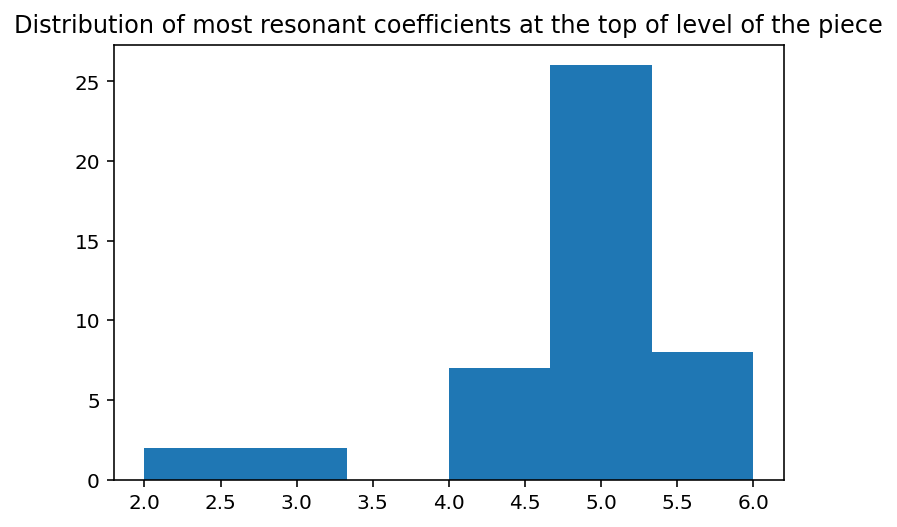

In [3]:
coeffs = [d[0] for d in data.values()]
plt.hist(coeffs, bins=6)
plt.title('Distribution of most resonant coefficients at the top of level of the piece')

In [4]:
scores_e = glob('./scores2/suite_bergamasque 1890+1891/*.mid')
data_e = {}
for score in scores_e:
    try:
        data_e[score] = predict_scale(score, ver_ratio=0.8)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_II._Menuet.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid is a diatonic scale
could not predict
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\premiere_arabesque.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Suite_bergamasque_Prelude.mid is a diatonic scale


Text(0.5, 1.0, 'Distribution of most resonant coefficients at the top of level of the piece- early ')

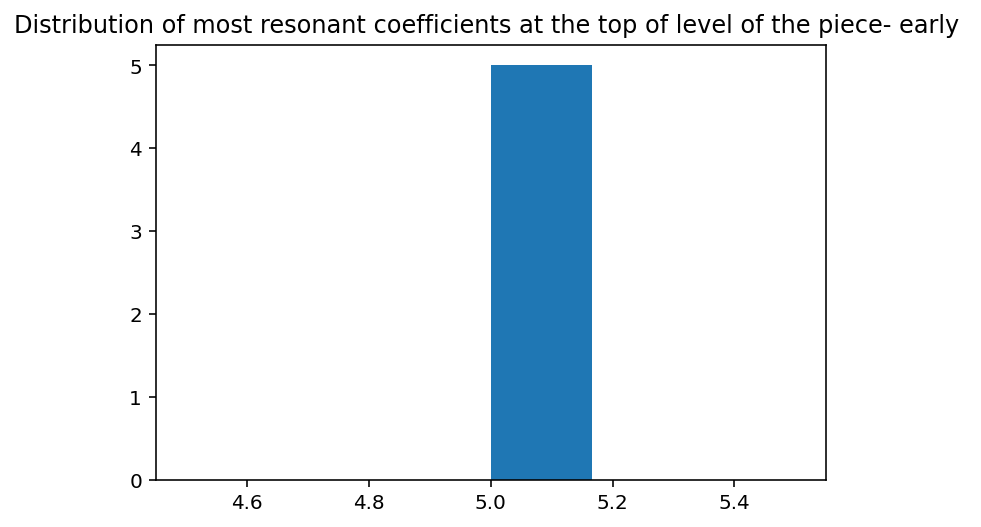

In [5]:
coeffs_e = [d[0] for d in data_e.values()]
plt.hist(coeffs_e, bins=6)
plt.title('Distribution of most resonant coefficients at the top of level of the piece- early ')

In [6]:
scores_p = glob('./scores2/preludes/*.mid')
data_p = {}
for score in scores_p:
    try:
        data_p[score] = predict_scale(score, ver_ratio=0.8)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_10_Canope.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_11_-_Les_tierces_alternes.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_12_Feux_dartifice.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_1_Brouillards.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_2_Feuilles_mortes.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_3_La_puerta_del_vino.mid is a diatonic scale
the most resonant coefficient is:  6
./scores2/preludes\Debussy_Prelude_Book_2_No_4_Les_fees_sont_dexquises_danseuses.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_5_Bruyres.mid is a diatonic scale

Text(0.5, 1.0, 'Distribution of most resonant coefficients at the top of level of the piece-preludes')

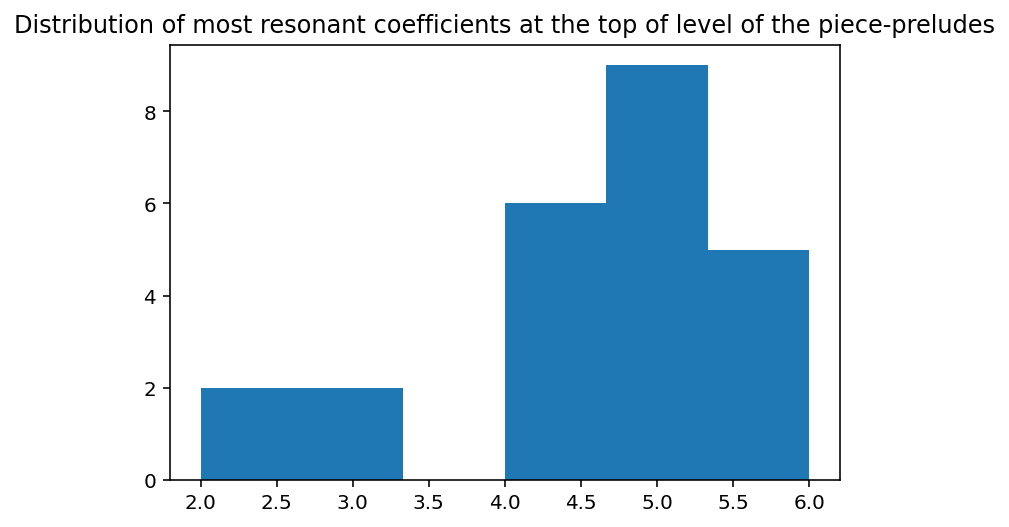

In [7]:
coeffs_p = [d[0] for d in data_p.values()]
plt.hist(coeffs_p, bins=6)
plt.title('Distribution of most resonant coefficients at the top of level of the piece-preludes')

In [8]:
data_l = {}
for score in scores:
    try:
        data_l[score] = predict_scale(score, ver_ratio = 0.2)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_I._Prelude.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_II._Menuet.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1890Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid is a diatonic scale
could not predict
the most resonant coefficient is:  5
./scores\1891premiere_arabesque.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1903debussy_estampes_1_(c)galimberti.mid is a pentatonic scale
the most resonant coefficient is:  5
./scores\1903estamp2_La soirée_dans_Grenade.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1903estamp3_Jardins_sous_la_pluie.mid is a diatonic scale
the most resonant coefficient is:  5
./scores\1905estamp1_Pagodes.mid is a pentatonic scale
the most

Text(0.5, 1.0, 'Distribution of most resonant coefficients at the lowest of level of the piece')

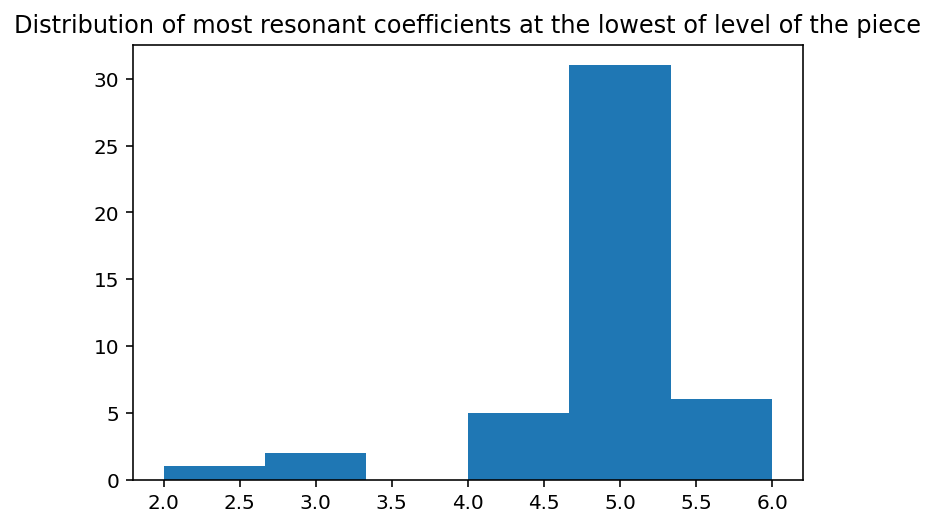

In [9]:
coeffs_l = [d[0] for d in data_l.values()]
plt.hist(coeffs_l, bins=6)
plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')

In [10]:
scores = glob('./scores2/suite_bergamasque 1890+1891/*.mid')
data_el = {}
for score in scores_e:
    try:
        data_el[score] = predict_scale(score, ver_ratio=0.2)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_II._Menuet.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid is a diatonic scale
could not predict
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\premiere_arabesque.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Suite_bergamasque_Prelude.mid is a diatonic scale


Text(0.5, 1.0, 'Distribution of most resonant coefficients at the lowest of level of the piece-early')

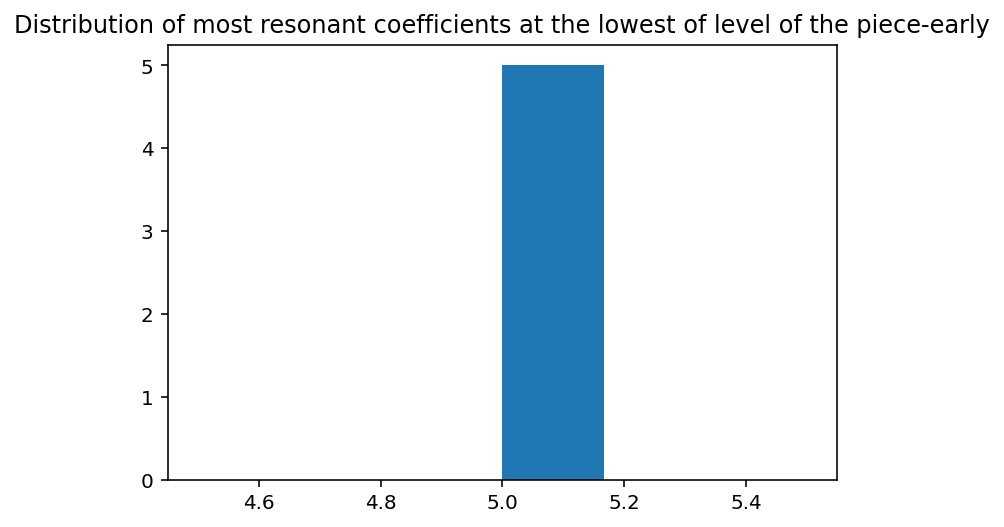

In [11]:
coeffs_el = [d[0] for d in data_el.values()]
plt.hist(coeffs_el, bins=6)
plt.title('Distribution of most resonant coefficients at the lowest of level of the piece-early')

In [12]:
scores = glob('./scores2/preludes/*.mid')
data_pl = {}
for score in scores_p:
    try:
        data_pl[score] = predict_scale(score, ver_ratio= 0.2)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_10_Canope.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_11_-_Les_tierces_alternes.mid is a diatonic scale
the most resonant coefficient is:  6
./scores2/preludes\Debussy_Prelude_Book_2_No_12_Feux_dartifice.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_1_Brouillards.mid is a M7 chord
the most resonant coefficient is:  6
./scores2/preludes\Debussy_Prelude_Book_2_No_2_Feuilles_mortes.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_3_La_puerta_del_vino.mid is a diatonic scale
the most resonant coefficient is:  6
./scores2/preludes\Debussy_Prelude_Book_2_No_4_Les_fees_sont_dexquises_danseuses.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_5_Bruyres.mid is a diatonic scale
the m

Text(0.5, 1.0, 'Distribution of most resonant coefficients at the lowest of level of the piece')

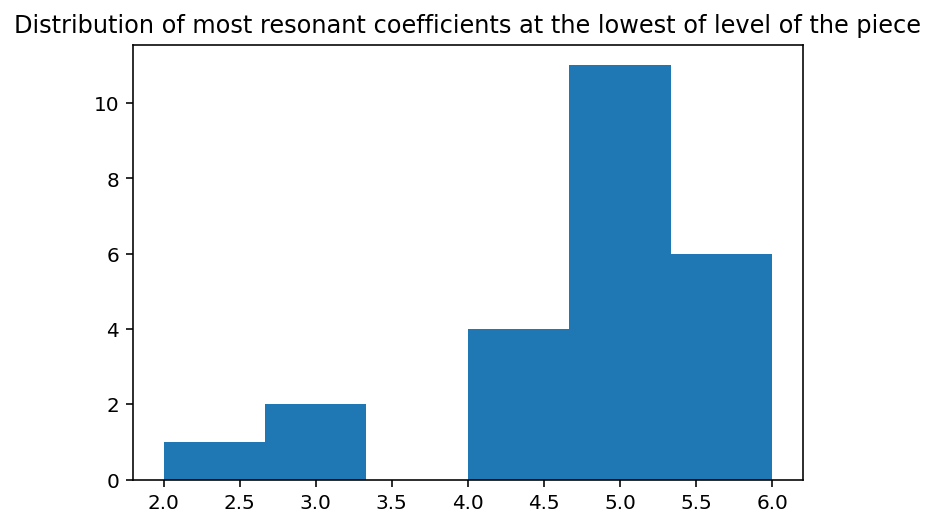

In [13]:
coeffs_pl = [d[0] for d in data_pl.values()]
plt.hist(coeffs_pl, bins=6)
plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')

In [14]:
scores = glob('./scores2/preludes/*.mid')
data_m = {}
for score in scores:
    try:
        data_m[score] = predict_scale(score, ver_ratio=0.5)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_10_Canope.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_11_-_Les_tierces_alternes.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_12_Feux_dartifice.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_1_Brouillards.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_2_Feuilles_mortes.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_3_La_puerta_del_vino.mid is a diatonic scale
the most resonant coefficient is:  6
./scores2/preludes\Debussy_Prelude_Book_2_No_4_Les_fees_sont_dexquises_danseuses.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_5_Bruyres.mid is a diatonic scale

Text(0.5, 1.0, 'Distribution of most resonant coefficients at the mid level of the piece')

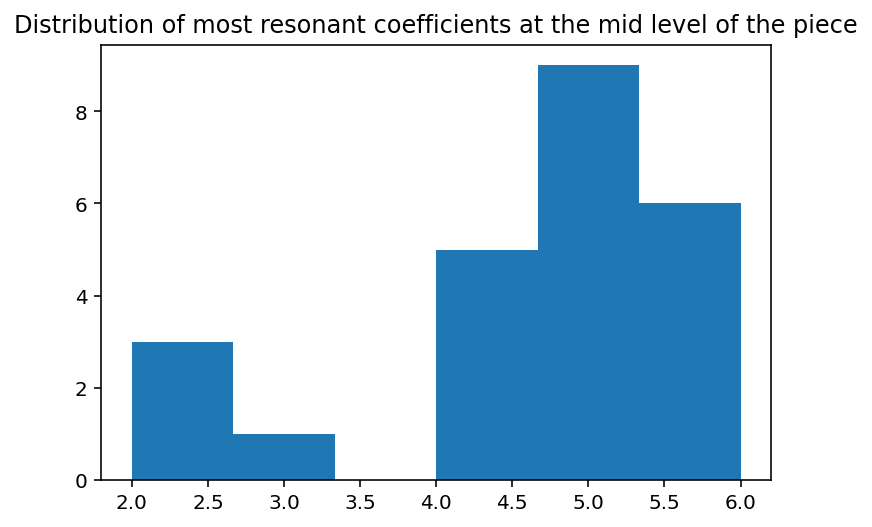

In [15]:
coeffs_m = [d[0] for d in data_m.values()]
plt.hist(coeffs_m, bins=6)
plt.title('Distribution of most resonant coefficients at the mid level of the piece')

In [16]:
data_em = {}
for score in scores_e:
    try:
        data_em[score] = predict_scale(score, ver_ratio=0.5)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_II._Menuet.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_III._Clair_de_Lune.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Debussy_-_Suite_Bergamasque_-_VI._Passepied.mid is a diatonic scale
could not predict
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\premiere_arabesque.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/suite_bergamasque 1890+1891\Suite_bergamasque_Prelude.mid is a diatonic scale


Text(0.5, 1.0, 'Distribution of most resonant coefficients at the mid level of the piece-early')

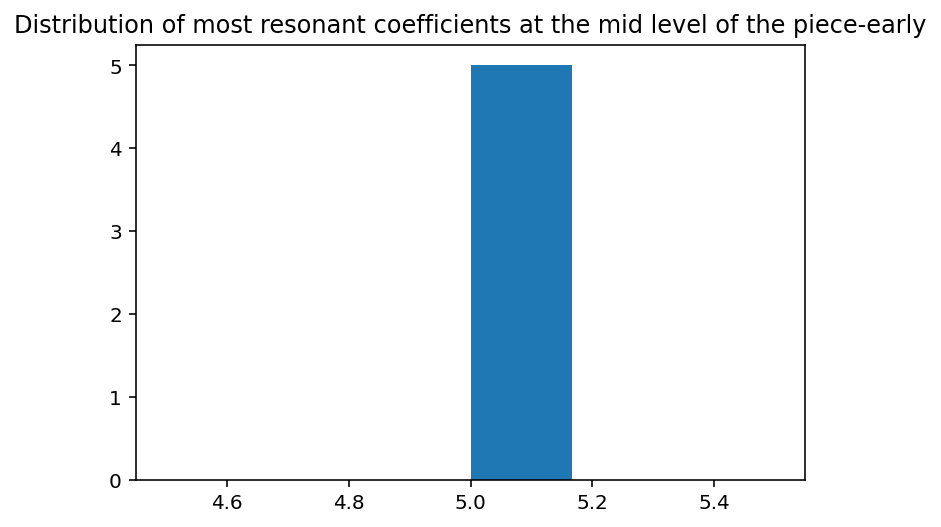

In [17]:
coeffs_em = [d[0] for d in data_em.values()]
plt.hist(coeffs_em, bins=6)
plt.title('Distribution of most resonant coefficients at the mid level of the piece-early')

In [18]:
data_pm = {}
for score in scores_p:
    try:
        data_pm[score] = predict_scale(score, ver_ratio=0.5)
    except:
        print('could not predict')

the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_10_Canope.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_11_-_Les_tierces_alternes.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_12_Feux_dartifice.mid is a diatonic scale
the most resonant coefficient is:  2
./scores2/preludes\Debussy_Prelude_Book_2_No_1_Brouillards.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_2_Feuilles_mortes.mid is a diatonic scale
the most resonant coefficient is:  4
./scores2/preludes\Debussy_Prelude_Book_2_No_3_La_puerta_del_vino.mid is a diatonic scale
the most resonant coefficient is:  6
./scores2/preludes\Debussy_Prelude_Book_2_No_4_Les_fees_sont_dexquises_danseuses.mid is a diatonic scale
the most resonant coefficient is:  5
./scores2/preludes\Debussy_Prelude_Book_2_No_5_Bruyres.mid is a diatonic scale

Text(0.5, 1.0, 'Distribution of most resonant coefficients at the mid level of the piece-preludes')

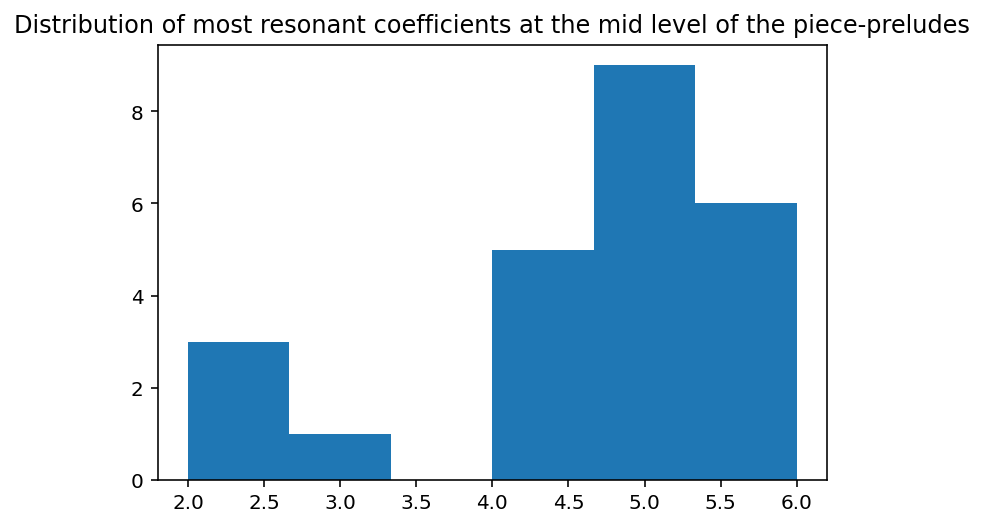

In [19]:
coeffs_pm = [d[0] for d in data_pm.values()]
plt.hist(coeffs_pm, bins=6)
plt.title('Distribution of most resonant coefficients at the mid level of the piece-preludes')

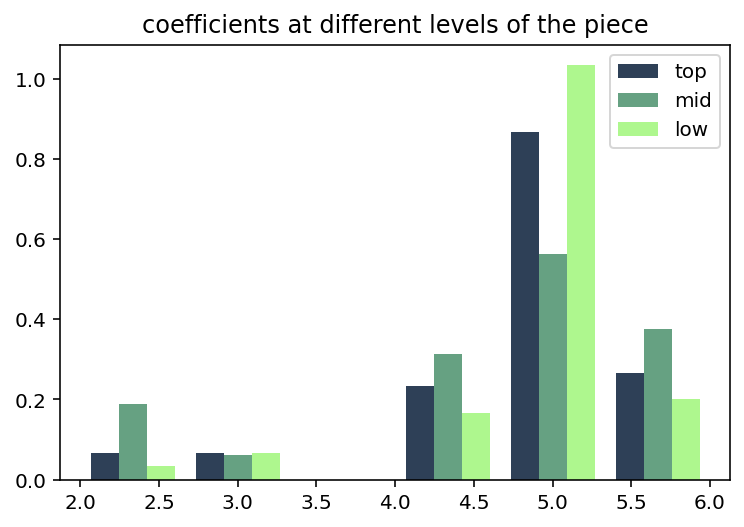

In [20]:
coeffs_l = [d[0] for d in data_l.values()]
coeffs = [d[0] for d in data.values()]
coeffs_m = [d[0] for d in data_m.values()]

#plt.hist(coeffs_l, bins=6)
#plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')

colors = ["#2E4057", "#66A182", "#AEF78E"]
labels = ['top','mid','low']
plt.hist([coeffs, coeffs_m, coeffs_l], 6, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('coefficients at different levels of the piece')



plt.show()

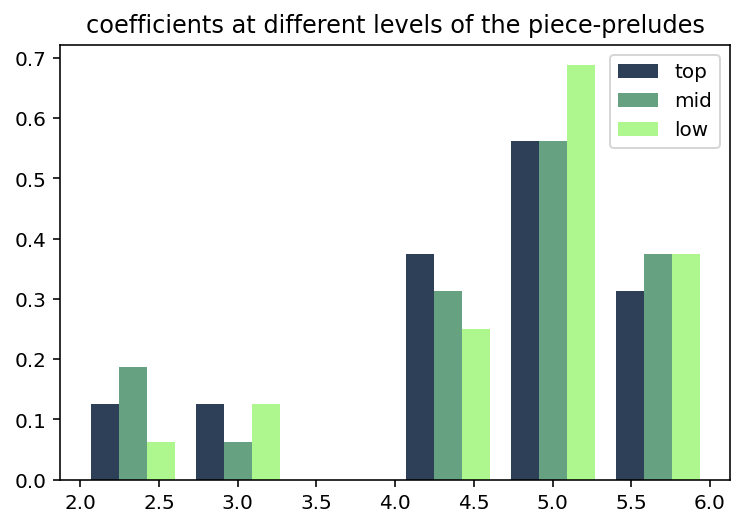

In [21]:
coeffs_pl = [d[0] for d in data_pl.values()]
coeffs_p = [d[0] for d in data_p.values()]
coeffs_pm = [d[0] for d in data_pm.values()]

#plt.hist(coeffs_l, bins=6)
#plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')

colors = ["#2E4057", "#66A182", "#AEF78E"]
labels = ['top','mid','low']
plt.hist([coeffs_p, coeffs_pm, coeffs_pl], 6, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('coefficients at different levels of the piece-preludes')



plt.show()

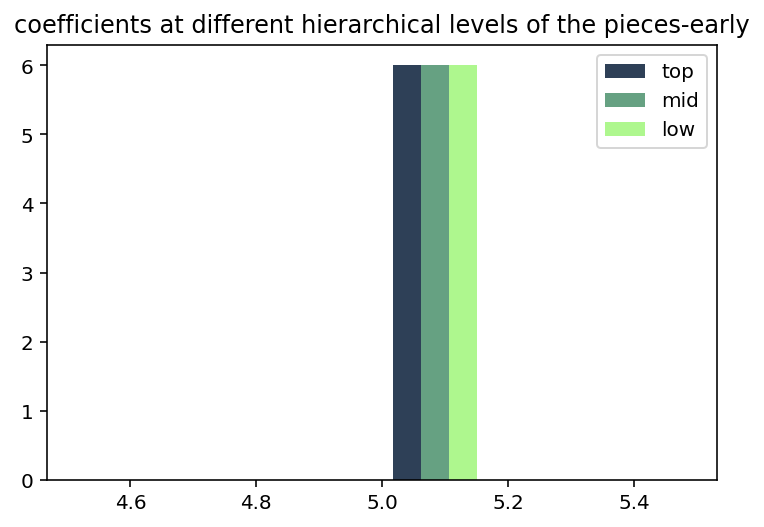

In [22]:
coeffs_el = [d[0] for d in data_el.values()]
coeffs_e = [d[0] for d in data_e.values()]
coeffs_em = [d[0] for d in data_em.values()]

#plt.hist(coeffs_l, bins=6)
#plt.title('Distribution of most resonant coefficients at the lowest of level of the piece')

colors = ["#2E4057", "#66A182", "#AEF78E"]
labels = ['top','mid','low']
plt.hist([coeffs_e, coeffs_em, coeffs_el], 6, density=True, histtype='bar', color=colors, label=labels)
plt.legend(prop={'size': 10})
plt.title('coefficients at different hierarchical levels of the pieces-early')



plt.show()

Text(0.5, 1.0, 'Coefficients across time- top level')

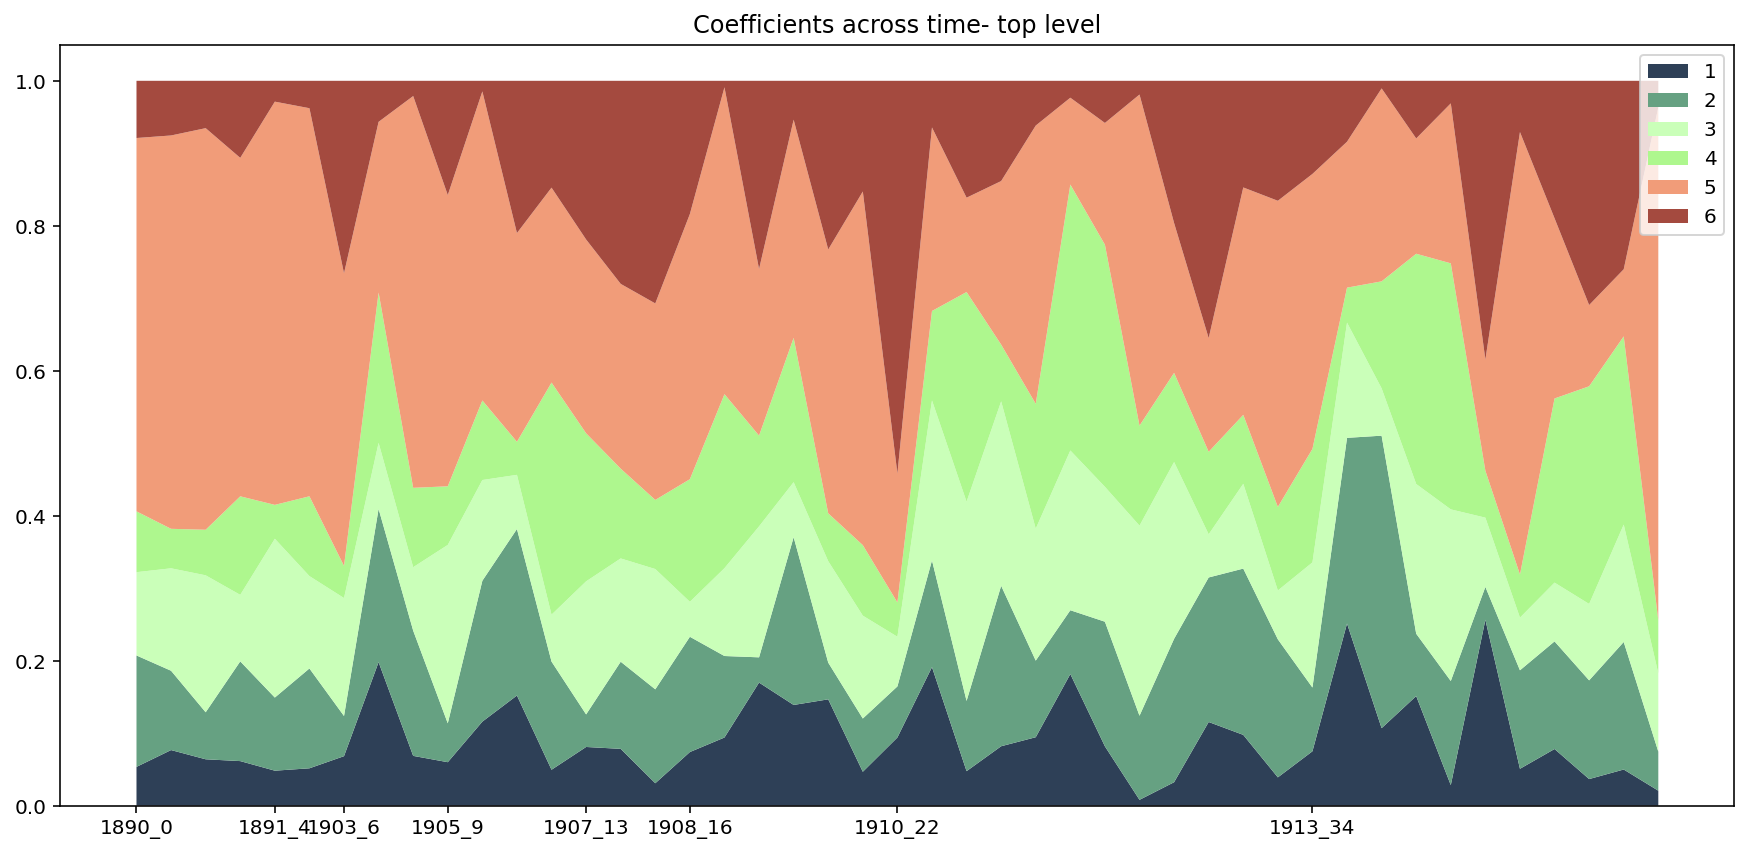

In [26]:
x = range(1,len(scores))
y = [] 
coeffs = [d[2] for d in data.values()]
cfr = pd.DataFrame(coeffs)
coeffs_perc = cfr.divide(cfr.sum(axis=1), axis=0)
scr = list(data.keys())
years = []
for i in range(len(scr)):
    years.append(scr[i].split('\\')[-1][:4]+'_'+str(i))
pal = ["#2E4057", "#66A182", "#CAFFB9", "#AEF78E","#F19C79", "#A44A3F"]
for i in range(6):
    y.append(coeffs_perc[i])
    
fig = plt.figure(figsize=(15, 7))
ax= fig.add_subplot() 

ax.stackplot(years,y[0],y[1], y[2],y[3],y[4],y[5],linewidth=0, colors = pal, labels=['1','2','3','4','5','6'])
ax.xaxis.set_major_locator(plt.FixedLocator([0, 4, 6, 9, 13, 16, 22,34]))

plt.legend(loc='upper right')
plt.title('Coefficients across time- top level')



Text(0.5, 1.0, 'Coefficients across time- midlevel')

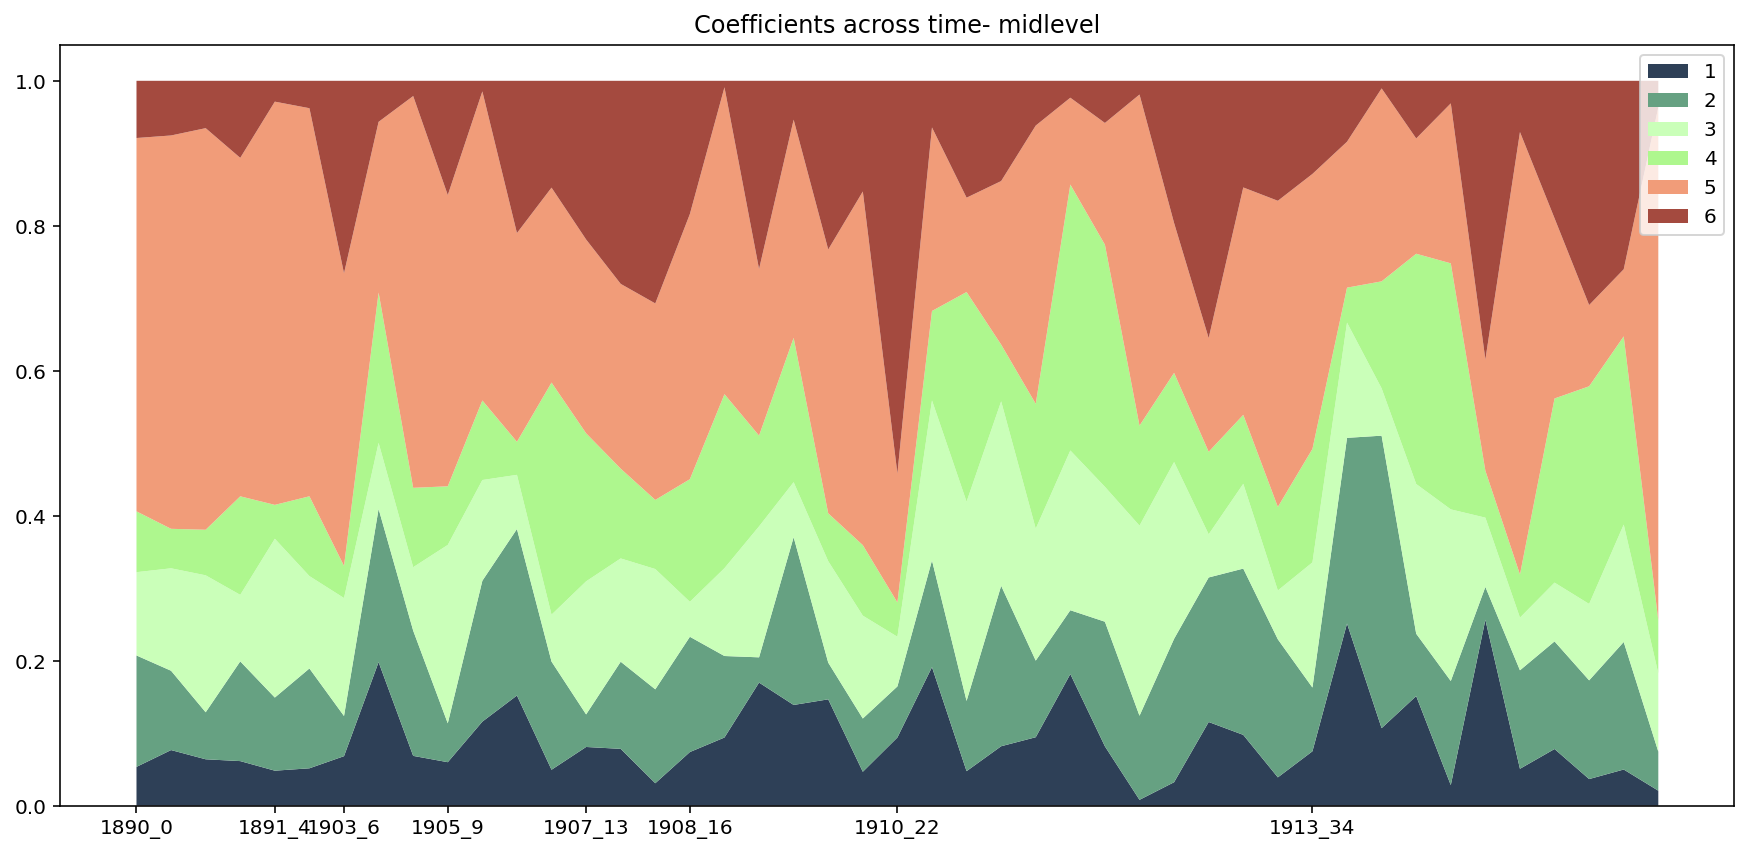

In [27]:
x = range(1,len(scores))
y = [] 
coeffs = [d[2] for d in data.values()]
cfr = pd.DataFrame(coeffs)
coeffs_perc = cfr.divide(cfr.sum(axis=1), axis=0)
scr = list(data.keys())
years = []
for i in range(len(scr)):
    years.append(scr[i].split('\\')[-1][:4]+'_'+str(i))
pal = ["#2E4057", "#66A182", "#CAFFB9", "#AEF78E","#F19C79", "#A44A3F"]
for i in range(6):
    y.append(coeffs_perc[i])
    
fig = plt.figure(figsize=(15, 7))
ax= fig.add_subplot() 

ax.stackplot(years,y[0],y[1], y[2],y[3],y[4],y[5],linewidth=0, colors = pal, labels=['1','2','3','4','5','6'])
ax.xaxis.set_major_locator(plt.FixedLocator([0, 4, 6, 9, 13, 16, 22,34]))

plt.legend(loc='upper right')
plt.title('Coefficients across time- midlevel')



Text(0.5, 1.0, 'Coefficients across time- lowlevel')

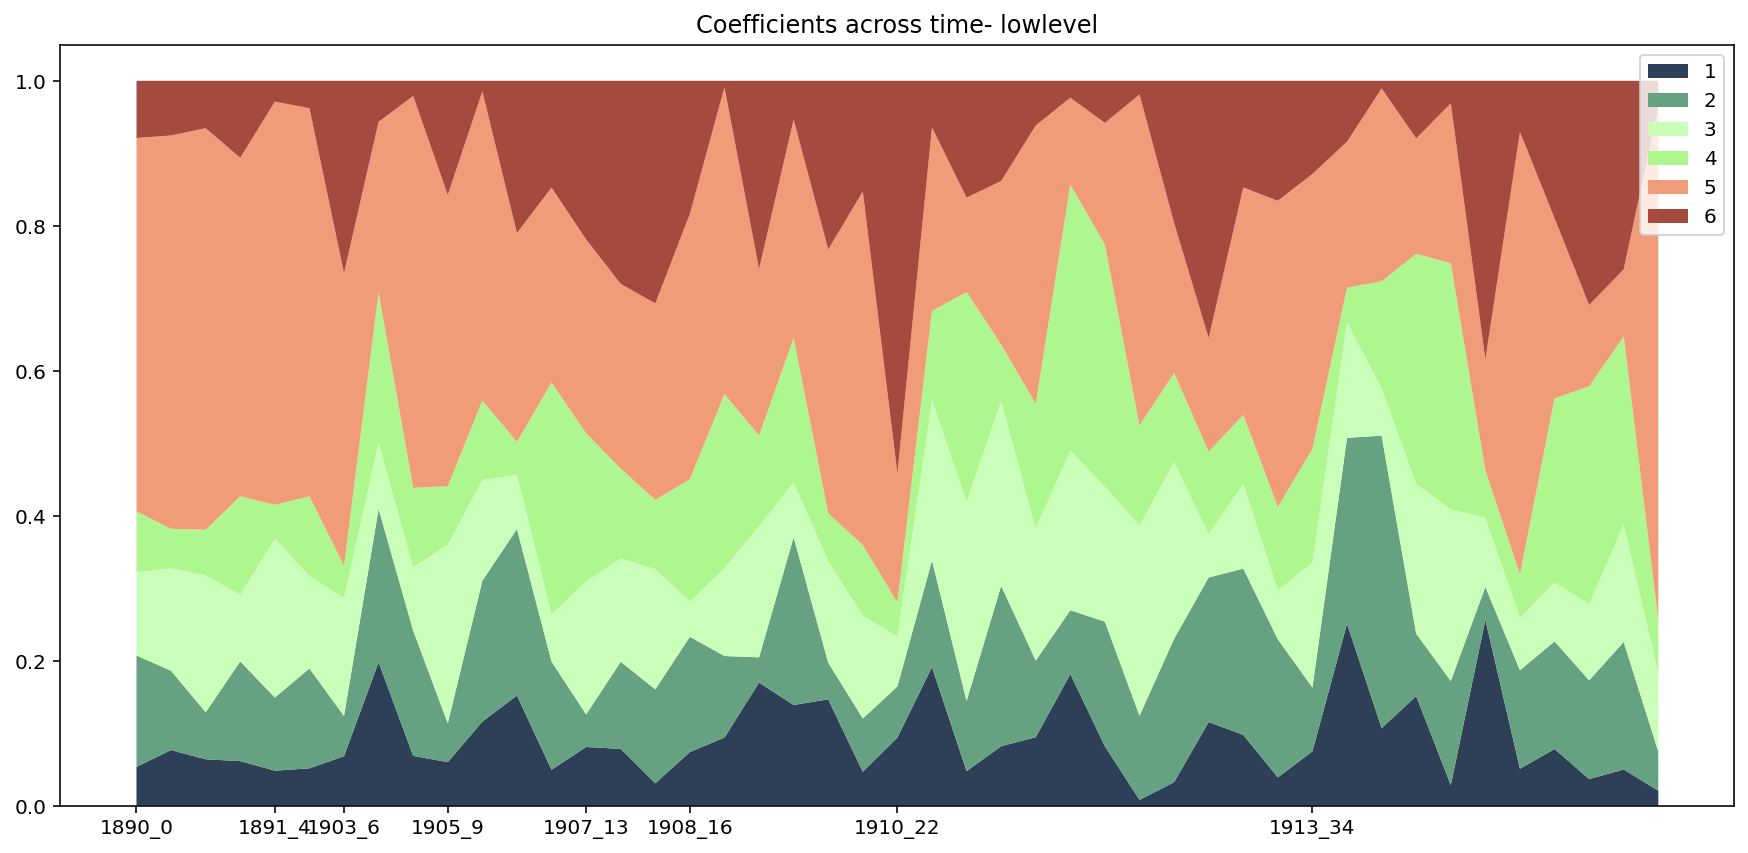

In [28]:
x = range(1,len(scores))
y = [] 
coeffs = [d[2] for d in data.values()]
cfr = pd.DataFrame(coeffs)
coeffs_perc = cfr.divide(cfr.sum(axis=1), axis=0)
scr = list(data.keys())
years = []
for i in range(len(scr)):
    years.append(scr[i].split('\\')[-1][:4]+'_'+str(i))
pal = ["#2E4057", "#66A182", "#CAFFB9", "#AEF78E","#F19C79", "#A44A3F"]
for i in range(6):
    y.append(coeffs_perc[i])
    
fig = plt.figure(figsize=(15, 7))
ax= fig.add_subplot() 

ax.stackplot(years,y[0],y[1], y[2],y[3],y[4],y[5],linewidth=0, colors = pal, labels=['1','2','3','4','5','6'])
ax.xaxis.set_major_locator(plt.FixedLocator([0, 4, 6, 9, 13, 16, 22,34]))

plt.legend(loc='upper right')
plt.title('Coefficients across time- lowlevel')


## Interpretation

Outlook on final interpretation

Interpreting your results is the final step that you will do in preparing Milestone 4 (your presentations). Please end your submission by giving a first,preliminary outlook on this final step: what aspects of your results do you find interesting with respect to your hypotheses and previous literature? What do you think might be the main points to elaborate upon in the discussion?

- General Points

The notebook should be complete and self-contained.

All processing and analysis steps must be explained.

Someone else should be able to reproduce the results based on your explanations without seeing the code.

Unused code and analyses should not be included.

- Useful Utilities

This notebook extension lets you easily create a Table of Contents and automatically deals with your heading numbering (not available for Jupyter Lab, only Notebook): https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/toc2/README.html 

Display the notebook online including JavaScript (e.g., in interactive plots), you can use https://nbviewer.jupyter.org/

If you’re interested, you can use this code in your notebook to toggle the display of source code on and off: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer